# Задание 1. Загрузка данных из файлов

Мы будем рассматривать популярную мобильную игру Clash of Clowns. Загружаем данные о том, когда новые игроки завершали учебный уровень в игре и сколько времени они потратили на прохождение, а также данные журнала посещений.

In [1]:
import pandas as pd
tutorial = pd.read_csv('hw_lesson02_tutorial_completed.csv')
tutorial.head(5)

,user_id,event_name,event_dt,duration_sec
0,--0-b0cbb8-a,tutorial_completed,2020-06-08 13:46:07,951
1,--014ca35_b7,tutorial_completed,2020-05-09 04:20:13,1143
2,--0424774bcb,tutorial_completed,2020-05-30 07:23:05,3758
3,--043682a1ad,tutorial_completed,2020-05-15 03:14:40,1326
4,--05-26b0-6b,tutorial_completed,2020-05-20 13:07:08,2828


In [2]:
sessions = pd.read_excel('hw_lesson02_sessions.xlsx.xlsx')
sessions.head(5)

,user_id,region,device,channel,session_duration,session_start
0,d35ad20dd45d,SEA,iPhone,GameAds,2589.186227,2020-04-01 17:51:25
1,ac4a113c52c_,CIS,iPhone,GameAds,1467.539334,2020-04-01 09:39:33
2,d0337d117cc8,CIS,iPhone,GameAds,3777.737508,2020-04-01 01:19:56
3,2f8c_262-_85,North America,iPhone,GameAds,3755.966201,2020-04-01 11:21:54
4,4b1-114-4692,Europe,iPhone,GameAds,2898.802314,2020-04-01 18:29:57


Исследуем данные с помощью команды info

In [3]:
sessions.info(), tutorial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167890 entries, 0 to 167889
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           167890 non-null  object        
 1   region            167890 non-null  object        
 2   device            167890 non-null  object        
 3   channel           167890 non-null  object        
 4   session_duration  167890 non-null  float64       
 5   session_start     167890 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 7.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59857 entries, 0 to 59856
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       59857 non-null  object
 1   event_name    59857 non-null  object
 2   event_dt      59857 non-null  object
 3   duration_sec  59857 non-null  int64 
dtypes: int64(1), o

(None, None)

Изучим категориальные переменные.

In [4]:
sessions['region'].value_counts()

CN               33116
North America    28260
CIS              26187
Europe           23413
South America    19962
Africa           15049
SEA              12356
Australia         9547
Name: region, dtype: int64

In [5]:
sessions['device'].value_counts()

Andoroid    116186
iPhone       51704
Name: device, dtype: int64

In [6]:
sessions['channel'].value_counts()

BrainPlus    77660
JetAds       38526
GameAds      34970
SenseAds     16734
Name: channel, dtype: int64

In [7]:
sessions['session_duration'].min(), sessions['session_duration'].max()

(0.0002282910481539417, 21197.16666061496)

In [8]:
sessions['session_start'].min(), sessions['session_start'].max()

(Timestamp('2020-04-01 00:00:23'), Timestamp('2020-06-30 23:59:45'))

In [9]:
tutorial['event_dt'].min(), tutorial['event_dt'].max()

('2020-04-01 00:04:01', '2020-06-30 23:54:40')

В обоих датафреймах данные покрывают временной интервал с 1 апреля по 30 июня.

# Задание 2. Описательная статистика

Исследуем колонки duration_sec и session_duration. Расчитаем для них среднее, среднеквадратическое отклонение и медиану.

In [10]:
tutorial['duration_sec'].mean() / 60, tutorial['duration_sec'].std() / 60, tutorial['duration_sec'].median() / 60

(44.942355948343554, 27.197112054898657, 39.96666666666667)

In [11]:
sessions['session_duration'].mean() / 60, sessions['session_duration'].std() / 60, sessions['session_duration'].median() / 60

(30.132045553160186, 30.130765971597008, 20.83862560779046)

Построим гистограмму для колоноки duration_sec. 

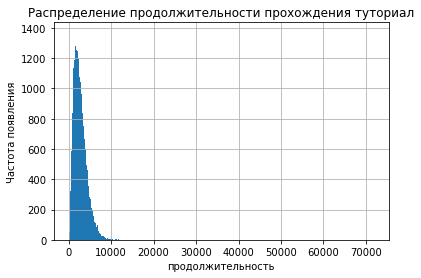

In [12]:
from matplotlib import pyplot as plt 
tutorial['duration_sec'].hist(bins = 1000)
plt.xlabel('продолжительность'), plt.ylabel('Частота появления'), plt.title('Распределение продолжительности прохождения туториал')
plt.show()

Продолжительность прохождения туториала имеет вид гамма распредения. Теперь построим гистограмму для колоноки session_duration.

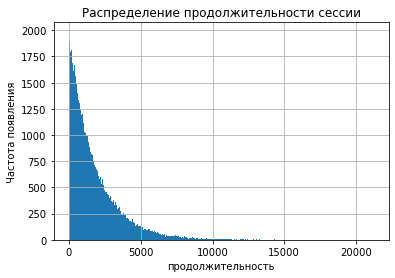

In [13]:
sessions['session_duration'].hist(bins = 1000)
plt.xlabel('продолжительность'), plt.ylabel('Частота появления'), plt.title('Распределение продолжительности сессии')
plt.show()

Продолжительность сессий имеет вид экспоненциального распределения.

# Задание 3. Исследование выбросов

Построим диаграммы размаха для обеих колонок.

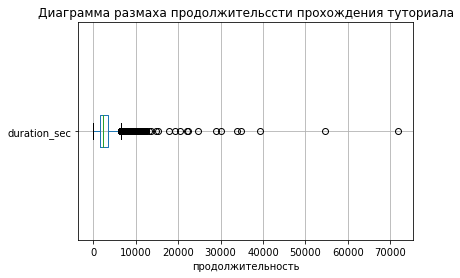

In [14]:
tutorial.boxplot('duration_sec', vert = False)
plt.xlabel('продолжительность'), plt.title('Диаграмма размаха продолжительссти прохождения туториала')
plt.show()

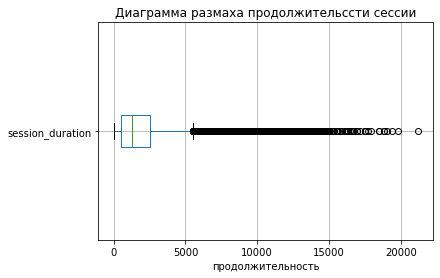

In [15]:
sessions.boxplot('session_duration', vert = False)
plt.xlabel('продолжительность'), plt.title('Диаграмма размаха продолжительссти сессии')
plt.show()

Для каждой колонки рассчитаем 99% перцентиль.

In [16]:
tutorial['duration_sec'].quantile(0.99), sessions['session_duration'].quantile(0.99)

(7605.440000000002, 8323.137208860211)

Мы видим, что большая часть выбросов оказалась выше 99% перцентиля.

# Задание 4. Сохранение данных в файл

С помощью query отфильтруем из таблиц визитов и учебных игр выбросы по столбцам duration_sec и session_duration. Запишем очищенные данные в csv файлы.

In [17]:
most_trusted_tutorial = tutorial.query('duration_sec < 7605')
most_trusted_tutorial.to_csv('most_trusted_tutorial.csv', index = False)
most_trusted_tutorial 

,user_id,event_name,event_dt,duration_sec
0,--0-b0cbb8-a,tutorial_completed,2020-06-08 13:46:07,951
1,--014ca35_b7,tutorial_completed,2020-05-09 04:20:13,1143
2,--0424774bcb,tutorial_completed,2020-05-30 07:23:05,3758
3,--043682a1ad,tutorial_completed,2020-05-15 03:14:40,1326
4,--05-26b0-6b,tutorial_completed,2020-05-20 13:07:08,2828
...,...,...,...,...
59852,fff68c81cb2f,tutorial_completed,2020-06-04 22:59:42,2578
59853,fff7d81ca3_5,tutorial_completed,2020-05-31 18:55:50,2078
59854,fff88bbb3_c8,tutorial_completed,2020-05-28 13:14:38,2544
59855,fff97c4d3c74,tutorial_completed,2020-06-16 09:35:12,1783


In [18]:
most_trusted_sessions = sessions.query('session_duration < 8323')
most_trusted_sessions.to_csv('most_trusted_sessions.csv', index = False)
most_trusted_sessions

,user_id,region,device,channel,session_duration,session_start
0,d35ad20dd45d,SEA,iPhone,GameAds,2589.186227,2020-04-01 17:51:25
1,ac4a113c52c_,CIS,iPhone,GameAds,1467.539334,2020-04-01 09:39:33
2,d0337d117cc8,CIS,iPhone,GameAds,3777.737508,2020-04-01 01:19:56
3,2f8c_262-_85,North America,iPhone,GameAds,3755.966201,2020-04-01 11:21:54
4,4b1-114-4692,Europe,iPhone,GameAds,2898.802314,2020-04-01 18:29:57
...,...,...,...,...,...,...
167885,f4436b_52dc_,CIS,Andoroid,BrainPlus,2775.695988,2020-06-30 15:14:56
167886,ad3-bc75a9fc,Europe,Andoroid,JetAds,1885.137209,2020-06-30 14:56:09
167887,a08d5af97-3d,Europe,Andoroid,BrainPlus,157.472441,2020-06-30 05:22:07
167888,-9_13acb52-7,Africa,Andoroid,BrainPlus,151.266928,2020-06-30 17:43:42


# Задание 5. Фильтрация выбросов с помощью функции

Напишем функцию filter_outliers, которая принимает на вход: датафрейм; наименование столбца, по которому в этом датафрейме нужно найти выбросы; значения границы выбросов для расчета перцентиля. Функция убирает из фрейма все выбросы по указанному столбцу и возвращает отфильтрованный датафрейм.

In [19]:
def filter_outliers(frame, column, quantile):
    p = frame[column].quantile(quantile)
    return frame[frame[column] < p]

In [20]:
filter_outliers(sessions, 'session_duration', 0.95)

,user_id,region,device,channel,session_duration,session_start
0,d35ad20dd45d,SEA,iPhone,GameAds,2589.186227,2020-04-01 17:51:25
1,ac4a113c52c_,CIS,iPhone,GameAds,1467.539334,2020-04-01 09:39:33
2,d0337d117cc8,CIS,iPhone,GameAds,3777.737508,2020-04-01 01:19:56
3,2f8c_262-_85,North America,iPhone,GameAds,3755.966201,2020-04-01 11:21:54
4,4b1-114-4692,Europe,iPhone,GameAds,2898.802314,2020-04-01 18:29:57
...,...,...,...,...,...,...
167885,f4436b_52dc_,CIS,Andoroid,BrainPlus,2775.695988,2020-06-30 15:14:56
167886,ad3-bc75a9fc,Europe,Andoroid,JetAds,1885.137209,2020-06-30 14:56:09
167887,a08d5af97-3d,Europe,Andoroid,BrainPlus,157.472441,2020-06-30 05:22:07
167888,-9_13acb52-7,Africa,Andoroid,BrainPlus,151.266928,2020-06-30 17:43:42
